# Fantasy Premier League

## FPL Season

Analysing a manager's FPL Season. 

In [1]:
import pandas as pd
import numpy as np 

## Rank

In [2]:
ranks = (
    pd.DataFrame(
        list(pd.read_json(f, orient='index')['overall_rank']),
        index=pd.read_json(f, orient='index').index
        )
    for f in [
        "../data/fpl_official/2021-22/season/manager_id_35868.json",
        "../data/fpl_official/2020-21/season/raw/manager_id_5144098.json"]
    )

ranks = pd.concat(ranks).T
ranks = ranks.rename(columns={35868: "2021-22", 5144098: "2020-21"})

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 5
mpl.rcParams['ytick.labelsize'] = 6

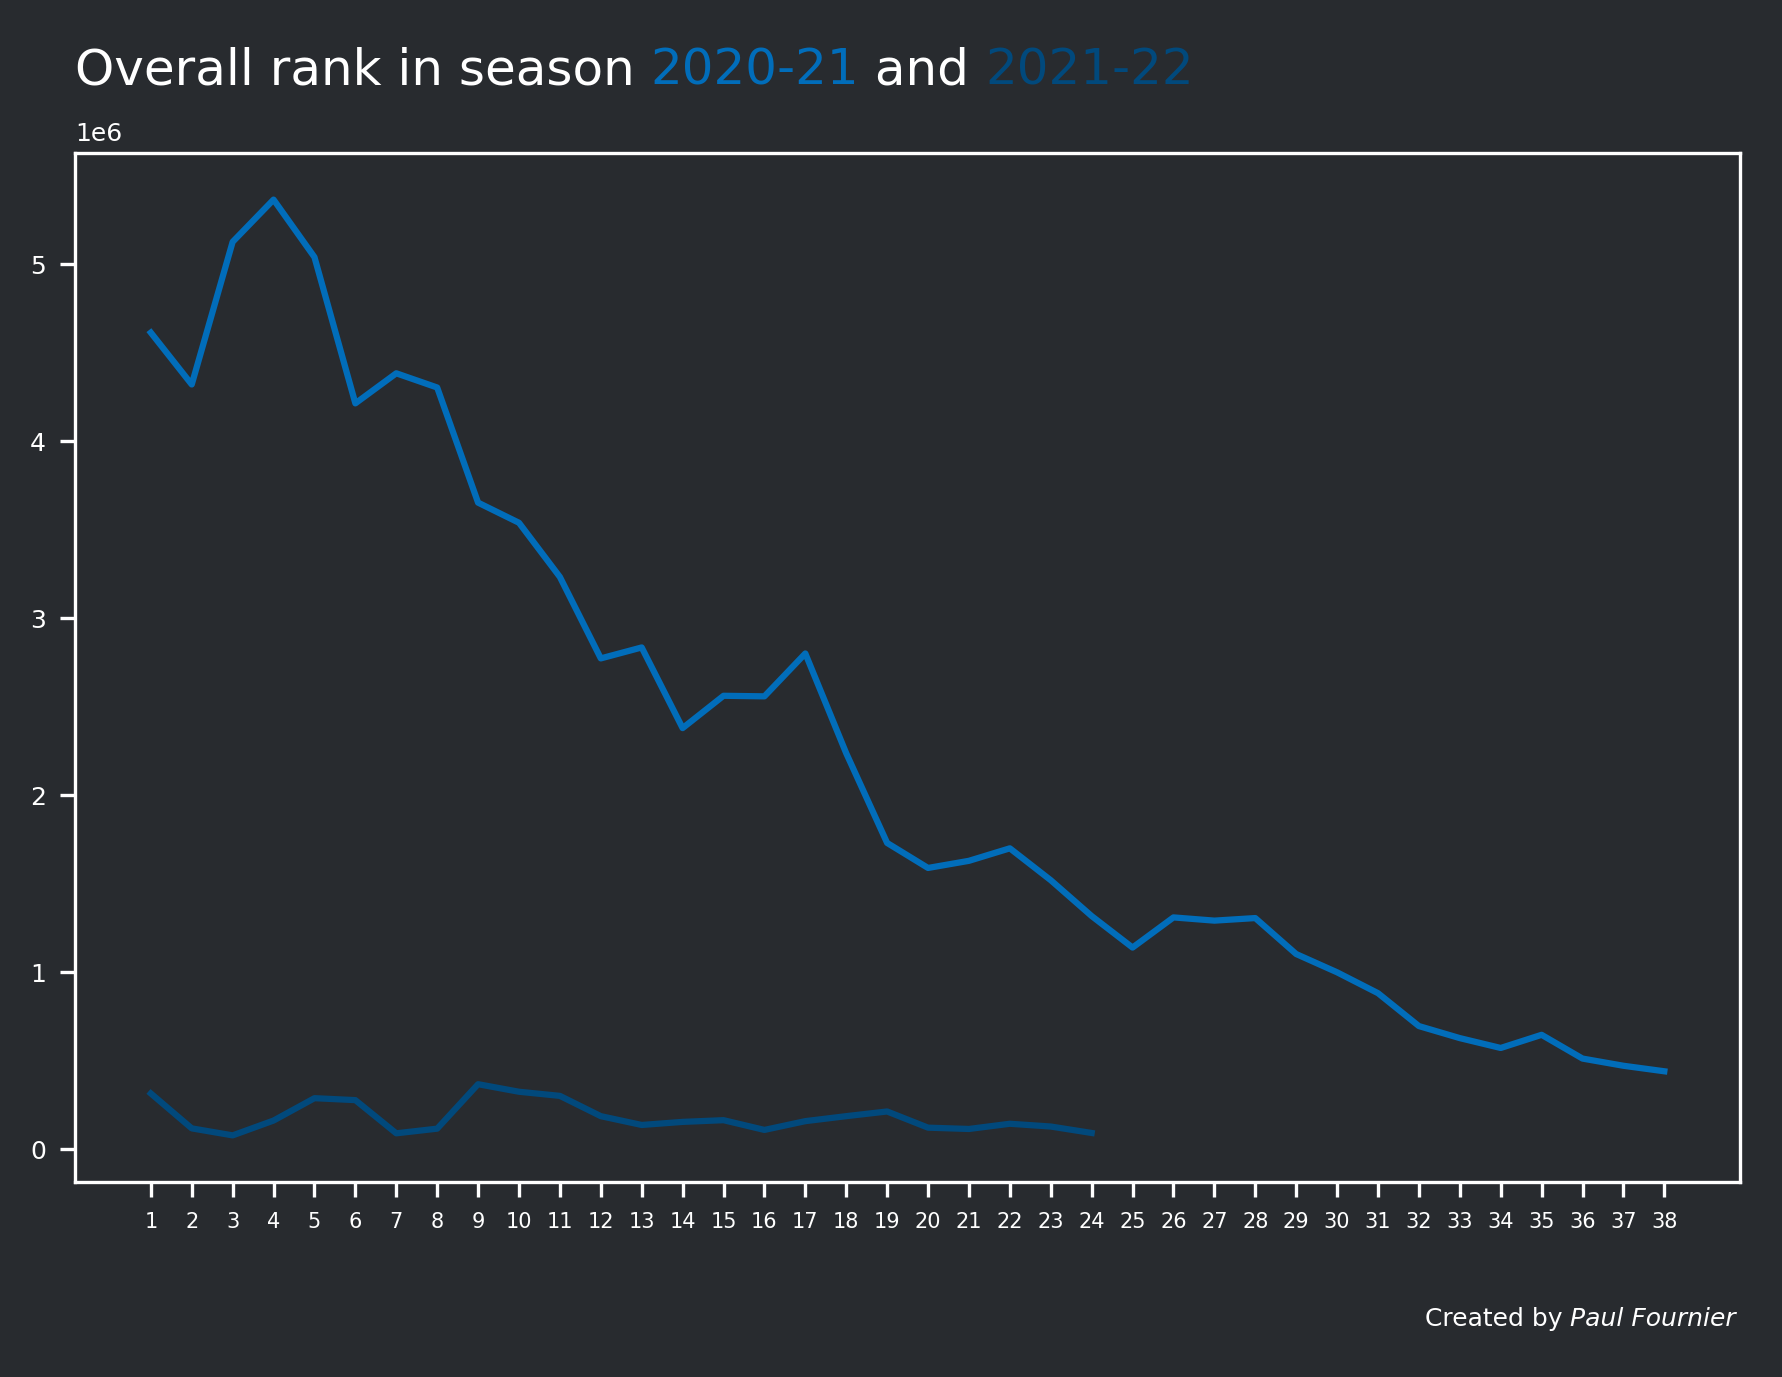

In [4]:
fig, ax = plt.subplots(tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.plot(
    np.arange(1, len(ranks[["2021-22"]].values.T[0])+1),
    ranks[["2021-22"]].values.T[0],
    color='#01497c')
ax.plot(
    np.arange(1, len(ranks[["2020-21"]].values.T[0])+1),
    ranks[["2020-21"]].values.T[0],
    color='#016DBA')

ax.set_xticks(np.arange(1, 39), minor=False)

fig_text(
    x=0.05, y=1.025,
    s="Overall rank in season <2020-21> and <2021-22>",
    highlight_textprops=[
        {"color": '#016DBA'},
        {"color": '#01497c'},
        ],
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.8, y=-0.025,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()

## Captain

In [5]:
cap = (
    pd.DataFrame(
        list(pd.read_json(f, orient='index')['cap']),
        index=pd.read_json(f, orient='index').index
        )
    for f in [
        "../data/fpl_official/2021-22/season/manager_id_35868.json",
        "../data/fpl_official/2020-21/season/raw/manager_id_5144098.json"]
    )

cap = pd.concat(cap).T
cap = cap.rename(columns={35868: "2021-22", 5144098: "2020-21"})
cap["gw"] = cap.index.astype(int)

In [6]:
cap_1 = cap.merge(
    pd.read_csv("../data/fpl_official/vaastav/data/2020-21/gws/merged_gw.csv"),
    right_on="element",
    left_on='2020-21',
    how="left")
cap_1['GW'] = cap_1['GW'].astype(int)
# Keep gw where cap was selected
cap_1 = cap_1[cap_1["gw"] == cap_1["GW"]]
cap_1 = cap_1.loc[:, ['2020-21', 'gw', 'total_points']]
# Count GW with hauls
hauls_1 = np.where(cap_1.groupby('gw').sum('total_points')['total_points'] > 5, 1, 0)

In [7]:
cap_2 = cap[cap['2021-22'].map(bool)].merge(
    pd.read_csv("../data/fpl_official/vaastav/data/2021-22/gws/merged_gw.csv"),
    right_on="element",
    left_on='2021-22',
    how="left")
cap_2['GW'] = cap_2['GW'].astype(int)
# Keep gw where cap was selected
cap_2 = cap_2[cap_2["gw"] == cap_2["GW"]]
cap_2 = cap_2.loc[:, ['2020-21', 'gw', 'total_points']]
# Count GW with hauls
hauls_2 = np.where(cap_2.groupby('gw').sum('total_points')['total_points'] > 5, 1, 0)

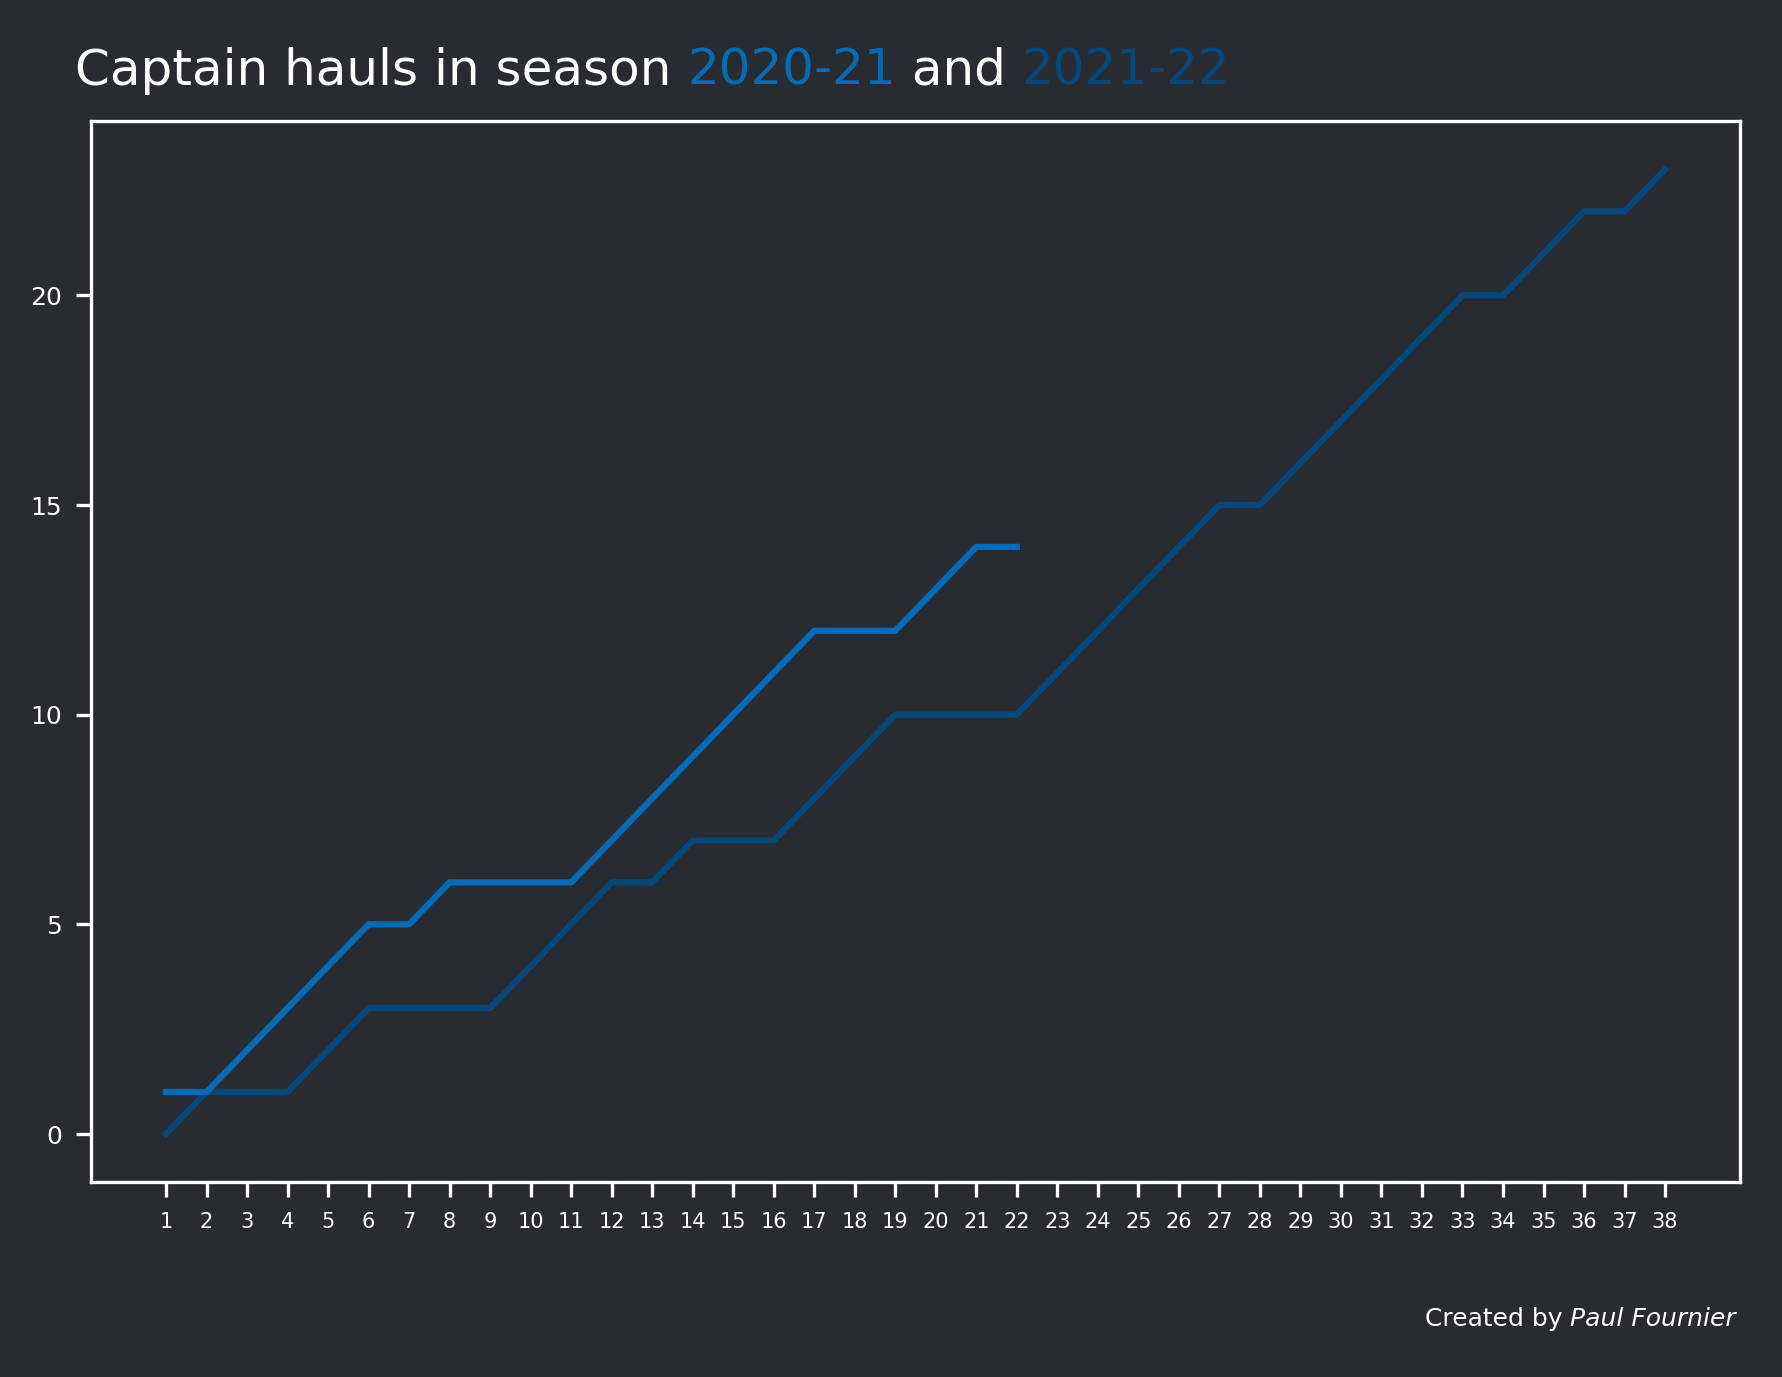

In [8]:
fig, ax = plt.subplots(tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.plot(
    np.arange(1, len(hauls_1)+1),
    np.cumsum(hauls_1),
    color='#01497c')
ax.plot(
    np.arange(1, len(hauls_2)+1),
    np.cumsum(hauls_2),
    color='#016DBA')

ax.set_xticks(np.arange(1, 39), minor=False)

fig_text(
    x=0.05, y=1.025,
    s="Captain hauls in season <2020-21> and <2021-22>",
    highlight_textprops=[
        {"color": '#016DBA'},
        {"color": '#01497c'},
        ],
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.8, y=-0.025,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()

# Transfer

In [9]:
transfer = (
    pd.DataFrame(
        list(pd.read_json(f, orient='index')['transfers']),
        index=pd.read_json(f, orient='index').index
        )
    for f in [
        "../data/fpl_official/2021-22/season/manager_id_35868.json",
        "../data/fpl_official/2020-21/season/raw/manager_id_5144098.json"]
    )

transfer = pd.concat(transfer).T
transfer = transfer.rename(columns={35868: "2021-22", 5144098: "2020-21"}).T

In [10]:
team = (
    pd.DataFrame(
        list(pd.read_json(f, orient='index')['team']),
        index=pd.read_json(f, orient='index').index
        )
    for f in [
        "../data/fpl_official/2021-22/season/manager_id_35868.json",
        "../data/fpl_official/2020-21/season/raw/manager_id_5144098.json"]
    )

team = pd.concat(team).T
team = team.rename(columns={35868: "2021-22", 5144098: "2020-21"}).T

In [11]:
real_points = pd.DataFrame().reindex_like(team)
ghost_points = pd.DataFrame().reindex_like(team)

In [12]:
for season in ['2020-21', '2021-22']:
    all_gw_data = pd.read_csv(
        os.path.join(f'../data/fpl_official/vaastav/data/{season}/gws/merged_gw.csv')
        )[['GW', 'element', 'total_points', 'minutes']]

    for gw in np.arange(1, 39):

        gw_data = all_gw_data[all_gw_data['GW'] == gw]

        # Real FPL Team
        fpl_team = gw_data[gw_data['element'].isin(team.loc[season, str(gw)])]

        # All player pts
        real_points.loc[season, str(gw)] = sum(fpl_team['total_points'])

        if gw > 1:
            # Previous GW FPL Team
            fpl_team = gw_data[gw_data['element'].isin(team.loc[season, str(gw-1)])]

            # All player pts
            ghost_points.loc[season, str(gw)] = sum(fpl_team['total_points'])

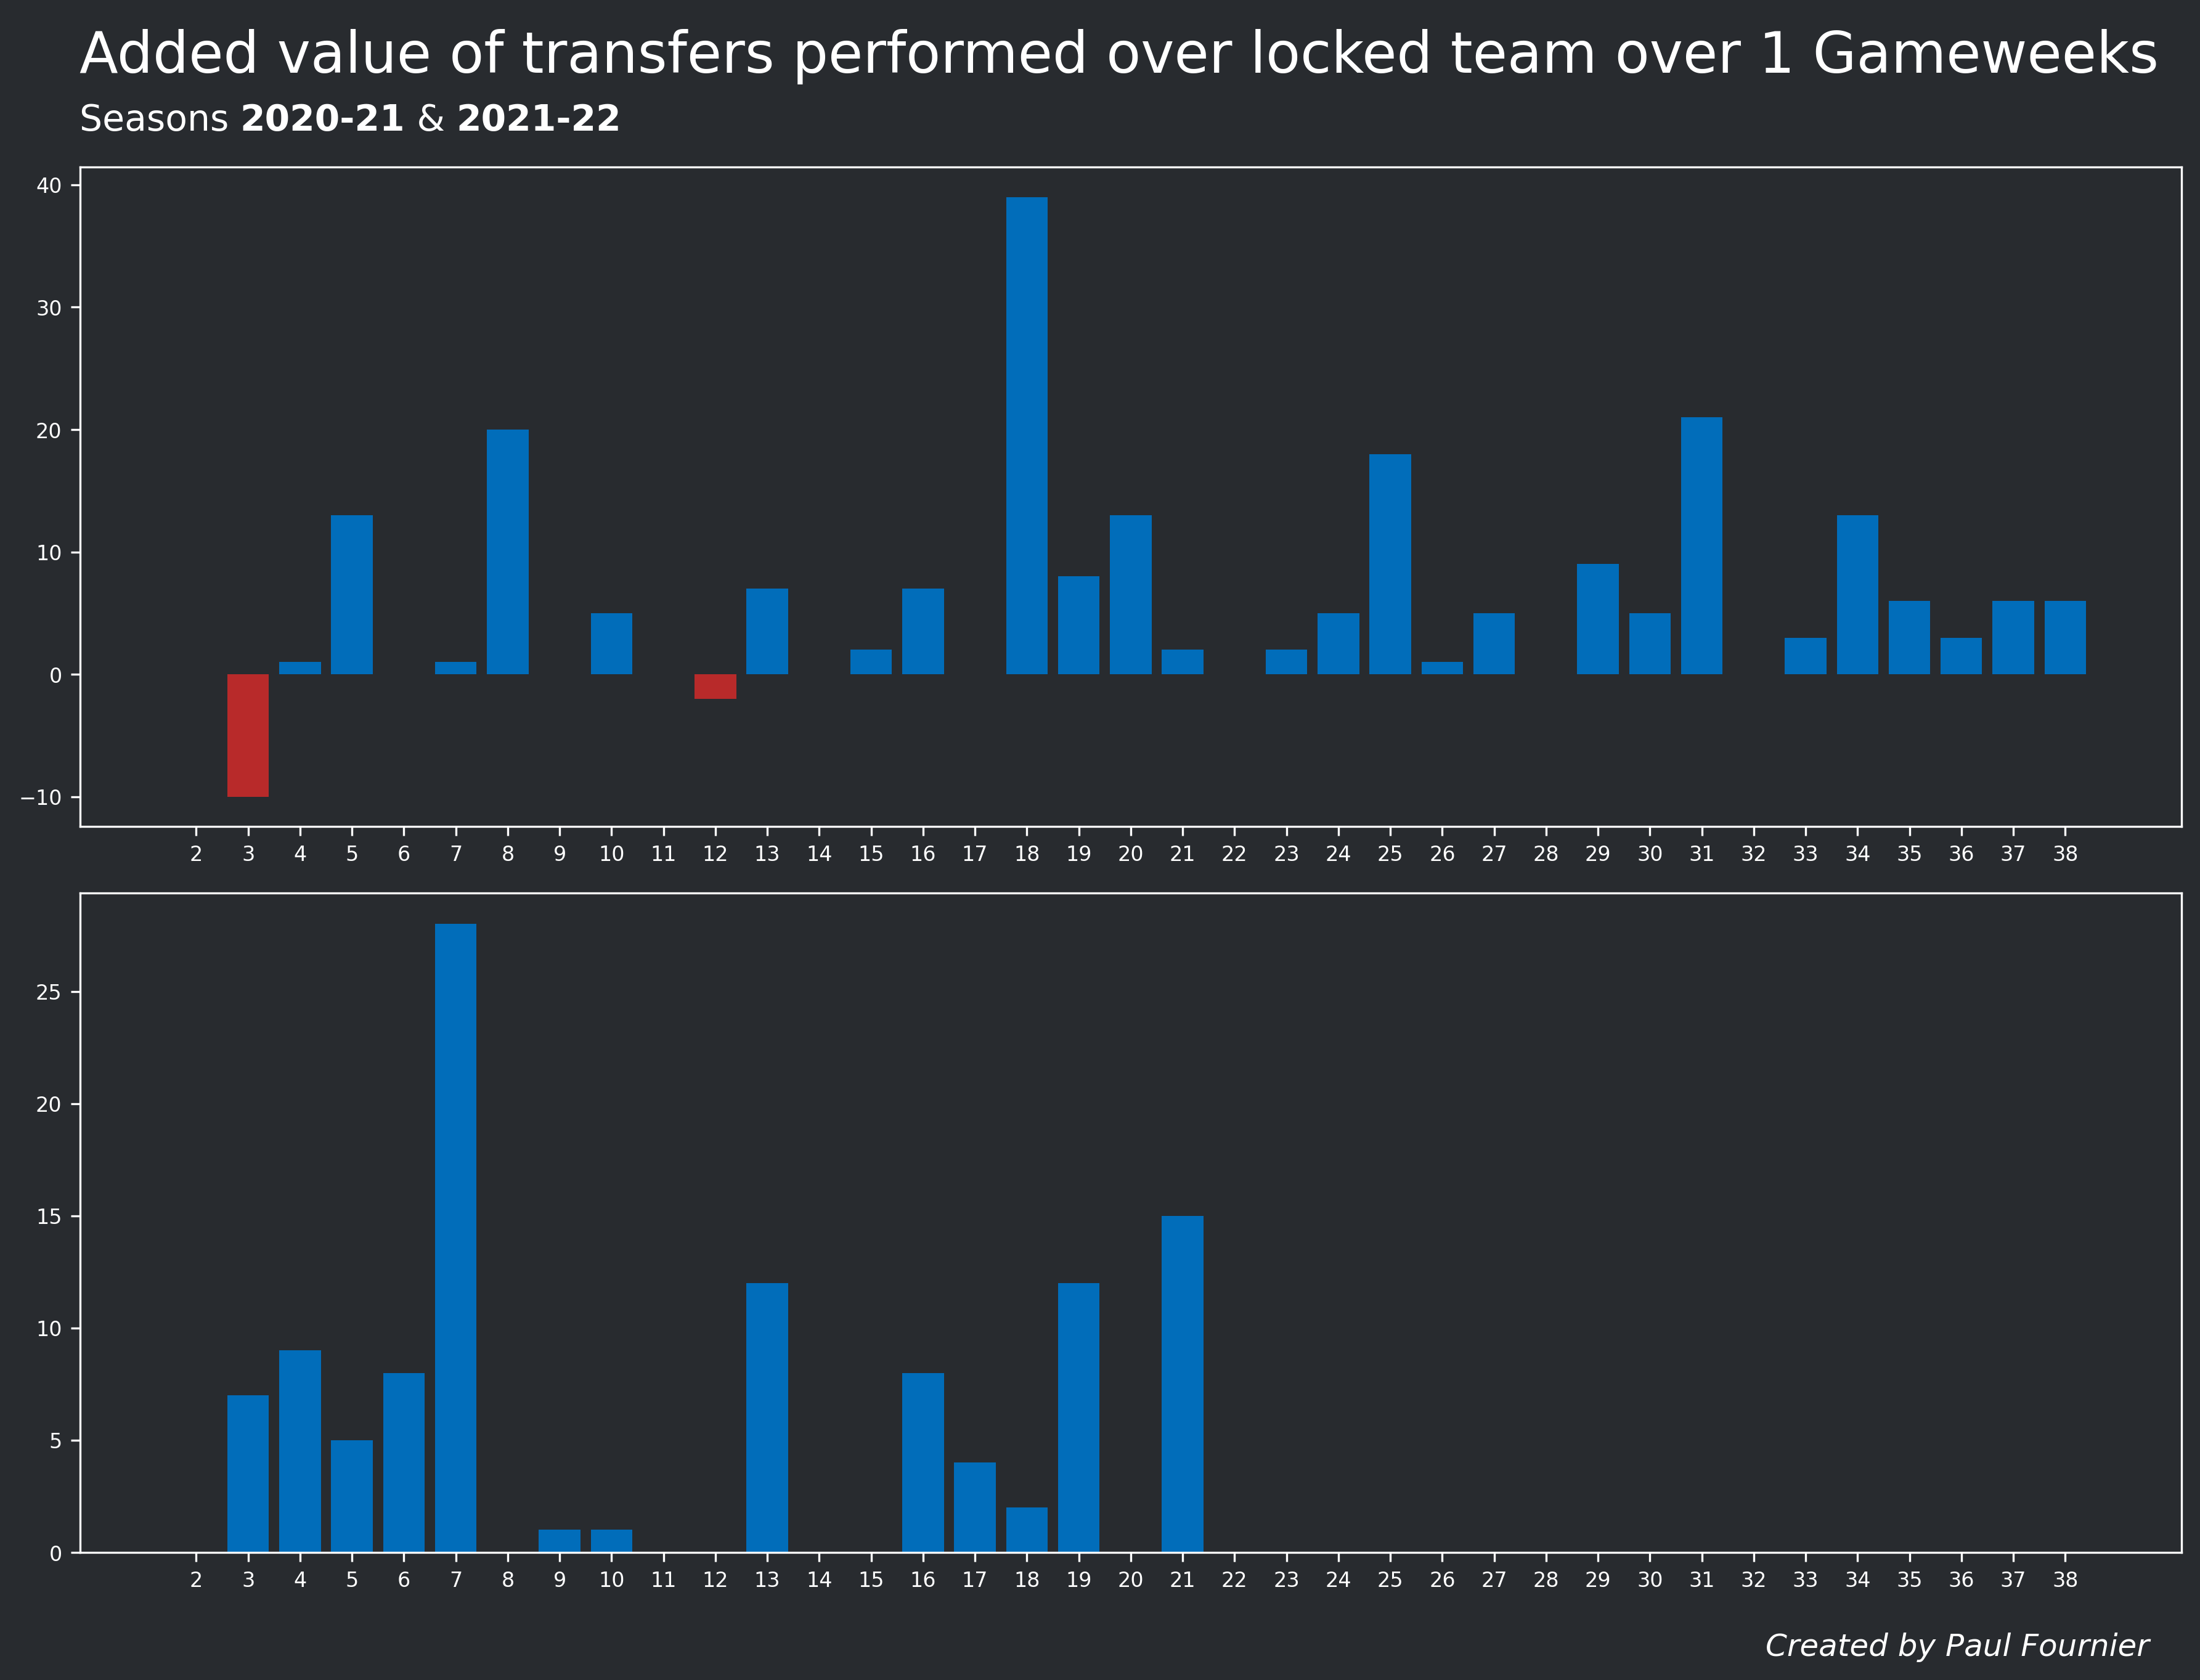

In [13]:
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8

fig, axs = plt.subplots(2, 1, figsize=(12, 8))
fig.set_facecolor(background)
axs[0].patch.set_alpha(0)
axs[1].patch.set_alpha(0)

axs[0].bar(
    ghost_points.T.index[1:],
    (real_points.T['2020-21'] - ghost_points.T['2020-21'])[1:],
    color=[
        "#016DBA" if val > 0 else "#B82A2A" for val in (
        real_points.T['2020-21'] - ghost_points.T['2020-21'])[1:].values ])

axs[1].bar(
    ghost_points.T.index[1:],
    (real_points.T['2021-22'] - ghost_points.T['2021-22'])[1:],
    color=[
        "#016DBA" if val > 0 else "#B82A2A" for val in (
        real_points.T['2021-22'] - ghost_points.T['2021-22'])[1:].values ])

fig_text(
    x=0.04, y=1.075,
    s="Added value of transfers performed over locked team over 1 Gameweeks",
    fontsize=22, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.04, y=1.025,
    s="Seasons <2020-21> & <2021-22>",
    highlight_textprops=[
        {"fontweight": "bold"},
        {"fontweight": "bold"}
    ],
    fontsize=14, fontfamily=title_font, color=text_color, alpha=1)

fig.text(
    0.8, -0.025, "Created by Paul Fournier", fontstyle="italic",
    fontsize=12, fontfamily=watermark_font, color=text_color)

plt.tight_layout()
plt.show()

In [14]:
real_points = pd.DataFrame().reindex_like(team).fillna(0)
ghost_points = pd.DataFrame().reindex_like(team).fillna(0)

In [15]:
for season in ['2020-21', '2021-22']:
    all_gw_data = pd.read_csv(
        os.path.join(f'../data/fpl_official/vaastav/data/{season}/gws/merged_gw.csv')
        )[['GW', 'element', 'total_points', 'minutes']]

    for gw in np.arange(1, 39):

        gw_data = all_gw_data[all_gw_data['GW'] == gw]

        # Real FPL Team
        for horizon in range(3):
            if gw + horizon > 38:
                break
            gw_data = all_gw_data[all_gw_data['GW'] == gw + horizon]
            fpl_team = gw_data[gw_data['element'].isin(team.loc[season, str(gw)])]

            # All player pts
            real_points.loc[season, str(gw)] += sum(fpl_team['total_points'])

            if gw > 1:
                # Previous GW FPL Team
                fpl_team = gw_data[gw_data['element'].isin(team.loc[season, str(gw - 1)])]

                # All player pts
                ghost_points.loc[season, str(gw)] += sum(fpl_team['total_points'])

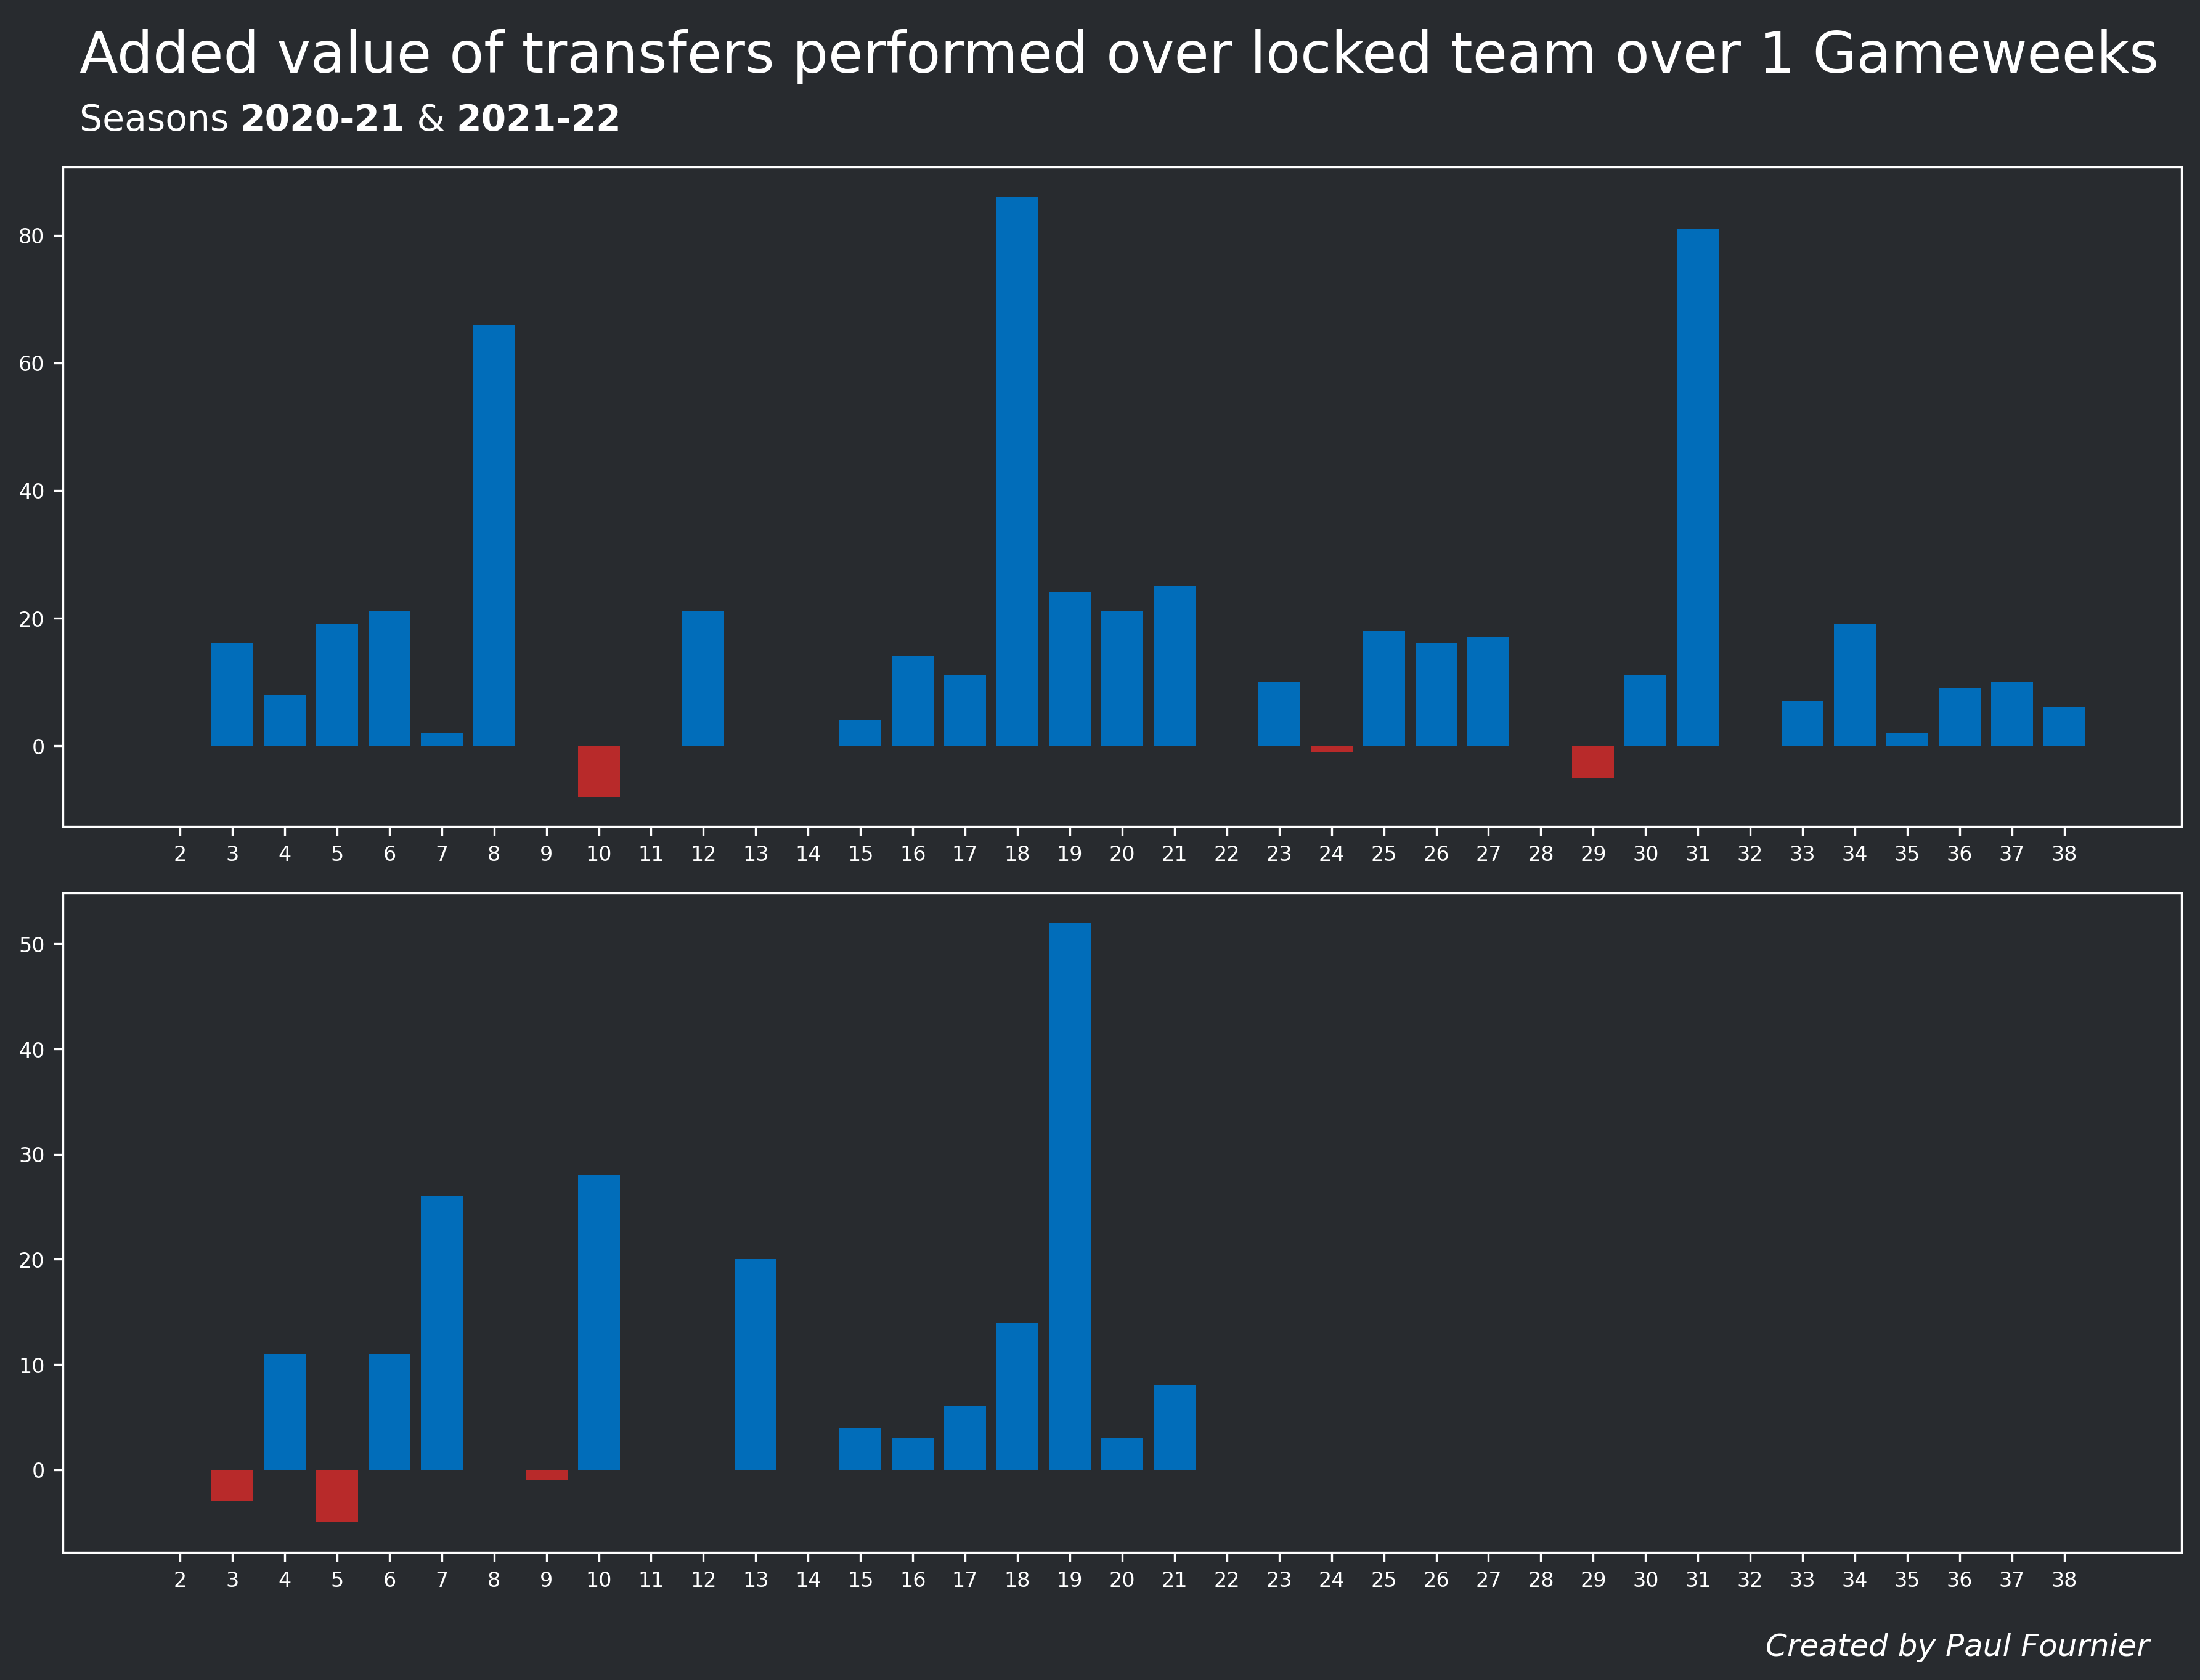

In [16]:
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8

fig, axs = plt.subplots(2, 1, figsize=(12, 8))
fig.set_facecolor(background)
axs[0].patch.set_alpha(0)
axs[1].patch.set_alpha(0)

axs[0].bar(
    ghost_points.T.index[1:],
    (real_points.T['2020-21'] - ghost_points.T['2020-21'])[1:],
    color=["#016DBA" if val > 0 else "#B82A2A" for val in (
        real_points.T['2020-21'] - ghost_points.T['2020-21'])[1:].values ])

axs[1].bar(
    ghost_points.T.index[1:],
    (real_points.T['2021-22'] - ghost_points.T['2021-22'])[1:],
    color=["#016DBA" if val > 0 else "#B82A2A" for val in (
        real_points.T['2021-22'] - ghost_points.T['2021-22'])[1:].values ])

fig_text(
    x=0.04, y=1.075,
    s="Added value of transfers performed over locked team over 1 Gameweeks",
    fontsize=22, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.04, y=1.025,
    s="Seasons <2020-21> & <2021-22>",
    highlight_textprops=[
        {"fontweight": "bold"},
        {"fontweight": "bold"}
    ],
    fontsize=14, fontfamily=title_font, color=text_color, alpha=1)

fig.text(
    0.8, -0.025, "Created by Paul Fournier", fontstyle="italic",
    fontsize=12, fontfamily=watermark_font, color=text_color)

plt.tight_layout()
plt.show()